In this notebook I will: 

In [145]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [146]:
pwd

'C:\\Users\\ziggy\\Springboard\\Python_Projects\\Spotify Hit Prediction\\2_Exploratory Data Analysis'

In [147]:
df = pd.read_csv(r'C:\\Users\\ziggy\\Springboard\\Python_Projects\\Spotify Hit Prediction\\1_Data Wrangling\\FullDataset.csv', index_col=0)

In [148]:
df.reset_index
df.head()


Title                        Artist  \
0         hanging by a moment                     lifehouse   
1                     fallin’                   alicia keys   
2                 all for you                 janet jackson   
3  drops of jupiter (tell me)                         train   
4                    i’m real  jennifer lopez feat. ja rule   

                      URI  danceability  energy   key  loudness  mode  \
0  0wqOReZDnrefefEsrIGeR4         0.541   0.864   1.0    -4.915   1.0   
1  0KQx6HOpJueiSkztcS0r7D         0.652   0.609  11.0    -7.519   0.0   
2  5X8kkUaUlAyAUr9TYqDFTH         0.753   0.934   2.0    -3.011   1.0   
3  2hKdd3qO7cWr2Jo0Bcs0MA         0.481   0.638   0.0    -5.862   1.0   
4  6MLsahMK3VvH9NUwXOktdS         0.708   0.587  11.0    -7.930   0.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0357       0.00118           0.00000    0.0896    0.435  124.557   
1       0.0370       0.26300           0.00101    0.2330    0.482   95.986   
2       0.0736       0.01740           0.06500    0.1280    0.730  113.525   
3       0.0276       0.15300           0.00000    0.1540    0.497   79.064   
4       0.1510       0.27300           0.00000    0.0718    0.554   83.460   

   duration_ms  time_signature  Target  
0     216067.0             4.0       1  
1     210200.0             3.0       1  
2     329933.0             3.0       1  
3     259933.0             4.0       1  
4     262133.0             4.0       1

In [149]:
#make all artist and title names lower case.

df['Title'] = df['Title'].str.lower()
df['Artist'] = df['Artist'].str.lower()

Definititons:
acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
   
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
 
Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. Need to check the negative values.

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

>= 0
<= 1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 17372
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             17373 non-null  object 
 1   Artist            17373 non-null  object 
 2   URI               17373 non-null  object 
 3   danceability      17373 non-null  float64
 4   energy            17373 non-null  float64
 5   key               17373 non-null  float64
 6   loudness          17373 non-null  float64
 7   mode              17373 non-null  float64
 8   speechiness       17373 non-null  float64
 9   acousticness      17373 non-null  float64
 10  instrumentalness  17373 non-null  float64
 11  liveness          17373 non-null  float64
 12  valence           17373 non-null  float64
 13  tempo             17373 non-null  float64
 14  duration_ms       17373 non-null  float64
 15  time_signature    17373 non-null  float64
 16  Target            17373 non-null  int64 

In [151]:
df.dtypes

Title                object
Artist               object
URI                  object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
Target                int64
dtype: object

In [152]:
n = len(pd.unique(df['URI']))
  
print("No. of unique URIs :", 
      n)

No. of unique URIs : 17373


In [153]:
df['Target'].value_counts()

0    15576
1     1797
Name: Target, dtype: int64

In [154]:
print('The number of hit songs represents',round(1797/17373*100, 2),'% of the total data.')

The number of hit songs represents 10.34 % of the total data.


In [155]:
#considering using artists as a feature..

print('There are',len(df['Artist'].unique()), 'unique Artists.')

There are 10256 unique Artists.


The cardinality is too high so I will end up dropping the Artists, Title, and URIs (unique identifiers)

In [156]:
df['Artist'].value_counts()

sound ideas          41
ed sheeran           37
elvis presley        36
lil wayne            35
erik satie           35
                     ..
pepe tovar            1
radamés gnattali      1
baby shower ideas     1
block b               1
sevgi asöcal          1
Name: Artist, Length: 10256, dtype: int64

In [189]:
#Removing all non-artists I come across. #ambient & #chill and #yoga are not an artist but rather a collection of sounds. I will drop them all. 


df = df[~(df.Artist.isin(['#ambient & #chill', '#yoga', 'sound ideas', '&aute&rom','digiffects sound effects library', 'the hollywood edge sound effects library','gibi asmr']))]

In [190]:
#Let's see which Artists are the most frequent in our dataset. 

recurring_artist = pd.DataFrame(df['Artist'].value_counts().loc[lambda x : x>10])
recurring_artist.head(50)

Artist
ed sheeran                                 37
elvis presley                              36
lil wayne                                  35
erik satie                                 35
bruce springsteen                          34
jack johnson                               33
grateful dead                              33
johann sebastian bach                      29
pyotr ilyich tchaikovsky                   29
curren$y                                   28
lady gaga                                  28
john williams                              28
coheed and cambria                         28
e-40                                       26
andrew lloyd webber                        25
anna thompson                              25
ephemeral rift                             25
for king & country                         23
jóhann jóhannsson                          23
fall out boy                               23
frank sinatra                              22
freddie gibbs                              22
bob dylan                                  21
florence + the machine                     21
rihanna                                    21
tyler, the creator                         21
drake                                      20
gorillaz                                   20
taylor swift                               20
daigoro789                                 19
frank zappa                                19
bing crosby                                19
the french whisperer                       19
steven universe                            18
juice wrld                                 18
andrew bird                                18
chris brown                                17
meek mill                                  17
post malone                                17
ennio morricone                            17
city and colour                            16
p!nk                                       16
nicki minaj                                16
various artists                            16
dead & company                             16
snoop dogg                                 16
little baby bum nursery rhyme friends      16
alexandre desplat                          15
lifeline audio books                       15
five finger death punch                    15

In [194]:
#Let's get sum of hit songs by Artists to get an idea of which Artists write the most hits. 

pivot = df.pivot_table(index=['Artist'], values=['Target'], aggfunc='sum')
pivot = pivot.reindex(pivot['Target'].sort_values(ascending=False).index)

In [198]:
pivot.head(25)

Target
Artist                     
rihanna                  17
drake                    16
taylor swift             16
p!nk                     15
kelly clarkson           13
beyonce                  11
britney spears           10
chris brown              10
katy perry               10
usher                    10
justin timberlake         9
maroon 5                  9
nickelback                9
ariana grande             9
eminem                    9
adele                     8
avril lavigne             8
the black eyed peas       8
ne-yo                     8
alicia keys               8
miley cyrus               8
lady gaga                 8
bruno mars                8
linkin park               7
coldplay                  7

These artists are very popular: rihanna, drake, taylor swift, p!nk, Kelly Clarkson, and Beyonce. 

It may be worth considering some of these as variables of their own to one hit encode.

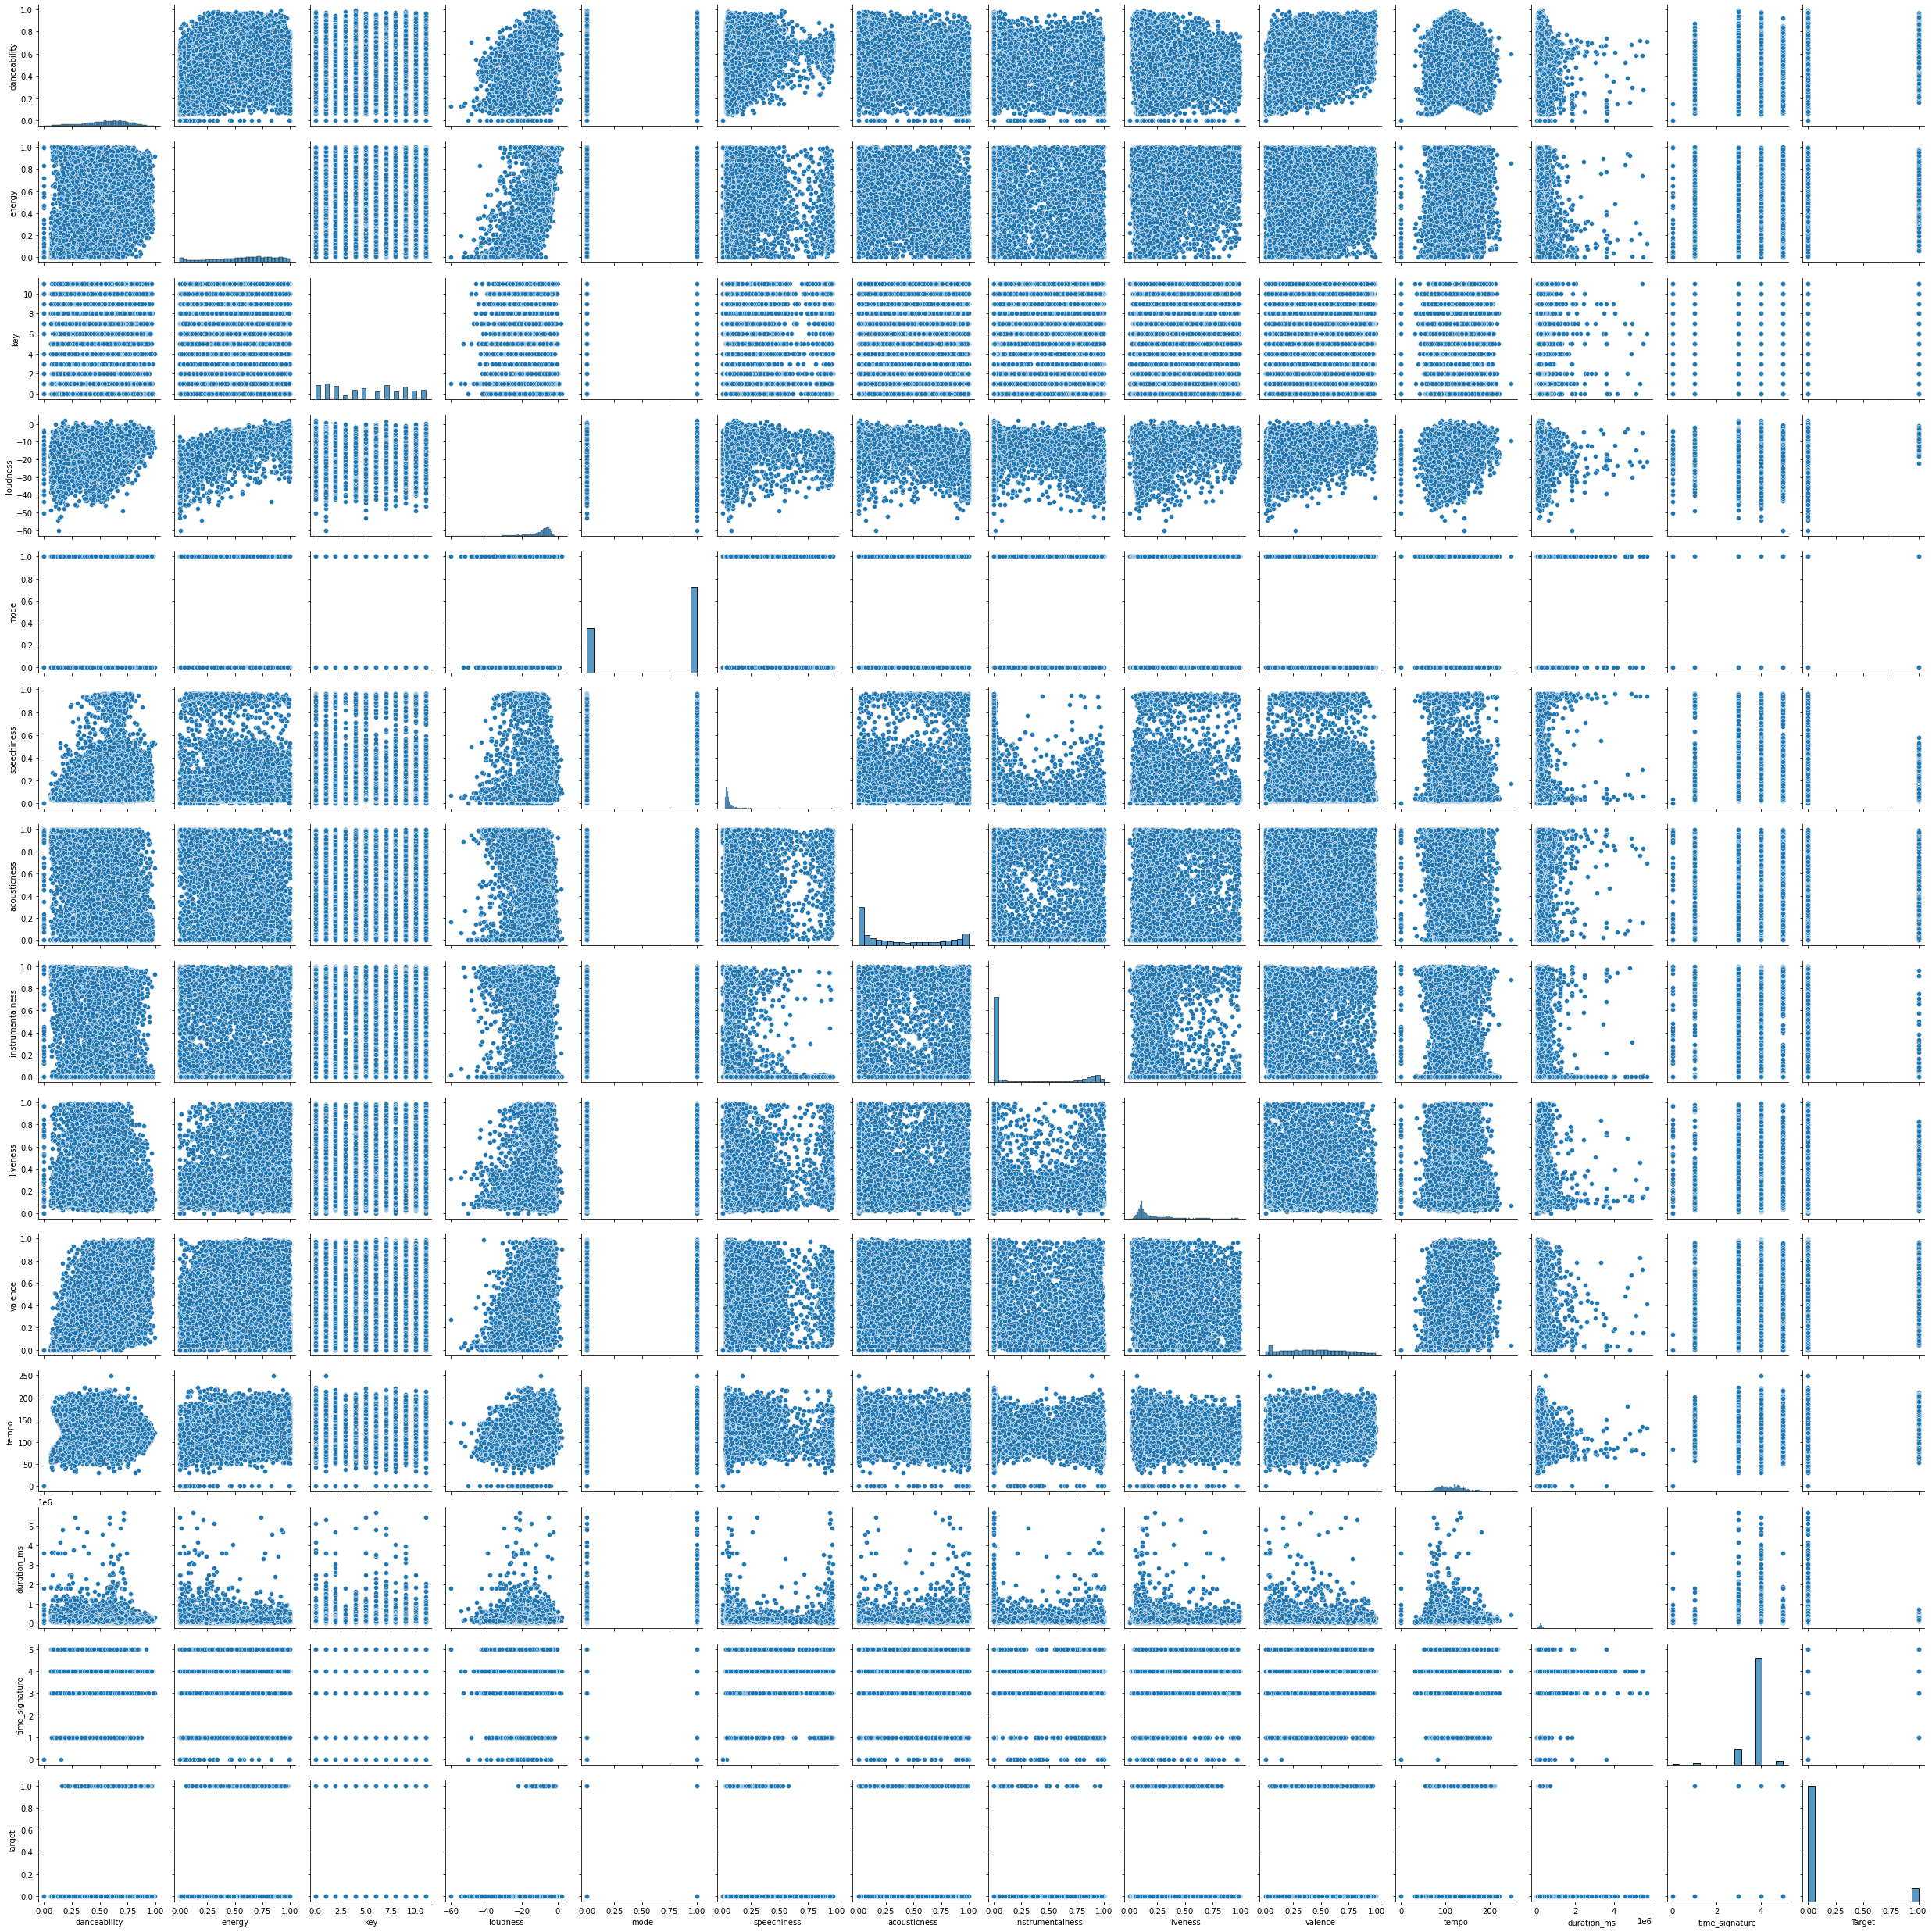

In [205]:
#Let's have a look at the relationships between our variables.

sns.pairplot(df, kind='scatter')

There are no clear linear relationships between our variables. 

Now I am going to scale the data. I will start by picking the numeric columns.

1. Feature correlation heatmap
2. Scale the data
3. PCA
4. components_

In [214]:
#Saving the further cleaned dataset to csv
df.to_csv('Cleaned_FullDataset')


In [207]:
data = df.drop(columns=['Title','Artist','URI'],axis=1)
data_uri = df.drop(columns=['Title','Artist'],axis=1)

In [208]:
data.head()

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.541   0.864   1.0    -4.915   1.0       0.0357       0.00118   
1         0.652   0.609  11.0    -7.519   0.0       0.0370       0.26300   
2         0.753   0.934   2.0    -3.011   1.0       0.0736       0.01740   
3         0.481   0.638   0.0    -5.862   1.0       0.0276       0.15300   
4         0.708   0.587  11.0    -7.930   0.0       0.1510       0.27300   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.00000    0.0896    0.435  124.557     216067.0             4.0   
1           0.00101    0.2330    0.482   95.986     210200.0             3.0   
2           0.06500    0.1280    0.730  113.525     329933.0             3.0   
3           0.00000    0.1540    0.497   79.064     259933.0             4.0   
4           0.00000    0.0718    0.554   83.460     262133.0             4.0   

   Target  
0       1  
1       1  
2       1  
3       1  
4       1

In [209]:
data_uri.head()

URI  danceability  energy   key  loudness  mode  \
0  0wqOReZDnrefefEsrIGeR4         0.541   0.864   1.0    -4.915   1.0   
1  0KQx6HOpJueiSkztcS0r7D         0.652   0.609  11.0    -7.519   0.0   
2  5X8kkUaUlAyAUr9TYqDFTH         0.753   0.934   2.0    -3.011   1.0   
3  2hKdd3qO7cWr2Jo0Bcs0MA         0.481   0.638   0.0    -5.862   1.0   
4  6MLsahMK3VvH9NUwXOktdS         0.708   0.587  11.0    -7.930   0.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0357       0.00118           0.00000    0.0896    0.435  124.557   
1       0.0370       0.26300           0.00101    0.2330    0.482   95.986   
2       0.0736       0.01740           0.06500    0.1280    0.730  113.525   
3       0.0276       0.15300           0.00000    0.1540    0.497   79.064   
4       0.1510       0.27300           0.00000    0.0718    0.554   83.460   

   duration_ms  time_signature  Target  
0     216067.0             4.0       1  
1     210200.0             3.0       1  
2     329933.0             3.0       1  
3     259933.0             4.0       1  
4     262133.0             4.0       1

In [210]:
#Let's convert the duration from miliseconds to seconds
data_uri['duration']=data_uri['duration_ms'].apply(lambda x: round(x/1000))
data_uri.drop(columns='duration_ms', inplace=True, axis=1)


<AxesSubplot:>

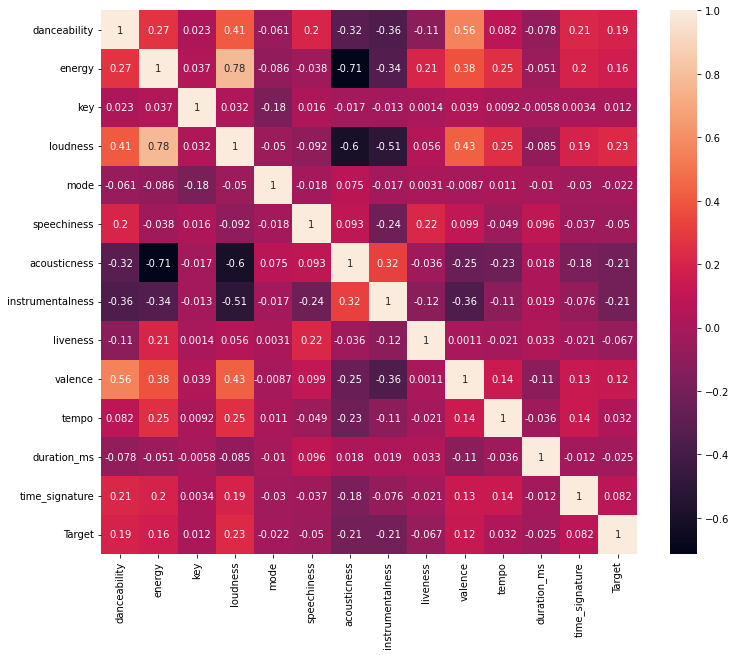

In [213]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot = True)



Energy and loudness have the hghest positive correlation which is no surprise. 

The largest negative correlation is between accousticness and loudness & energy. 

Our target variable on the other hand is not highly correlated with any of the variables. The highest value we see is .23 between Target and loudness. 



In [58]:
#Creating a new dataframe, `data_scale` from `data` whilst setting the index to URI
data_scale = data_uri.set_index('URI')
data_scale = data_scale.drop(columns='Target',axis=1)
#Saving the URI labels (using the index attribute of data_uri) into the variable data_scale_index
data_scale_index = data_scale.index
#Save the column names (using the `columns` attribute) of `data_scale` into the variable 'state_summary_columns'
data_scale_columns = data_scale.columns
data_scale.head()

danceability  energy   key  loudness  mode  \
URI                                                                  
0wqOReZDnrefefEsrIGeR4         0.541   0.864   1.0    -4.915   1.0   
0KQx6HOpJueiSkztcS0r7D         0.652   0.609  11.0    -7.519   0.0   
5X8kkUaUlAyAUr9TYqDFTH         0.753   0.934   2.0    -3.011   1.0   
2hKdd3qO7cWr2Jo0Bcs0MA         0.481   0.638   0.0    -5.862   1.0   
6MLsahMK3VvH9NUwXOktdS         0.708   0.587  11.0    -7.930   0.0   

                        speechiness  acousticness  instrumentalness  liveness  \
URI                                                                             
0wqOReZDnrefefEsrIGeR4       0.0357       0.00118           0.00000    0.0896   
0KQx6HOpJueiSkztcS0r7D       0.0370       0.26300           0.00101    0.2330   
5X8kkUaUlAyAUr9TYqDFTH       0.0736       0.01740           0.06500    0.1280   
2hKdd3qO7cWr2Jo0Bcs0MA       0.0276       0.15300           0.00000    0.1540   
6MLsahMK3VvH9NUwXOktdS       0.1510       0.27300           0.00000    0.0718   

                        valence    tempo  duration_ms  time_signature  
URI                                                                    
0wqOReZDnrefefEsrIGeR4    0.435  124.557     216067.0             4.0  
0KQx6HOpJueiSkztcS0r7D    0.482   95.986     210200.0             3.0  
5X8kkUaUlAyAUr9TYqDFTH    0.730  113.525     329933.0             3.0  
2hKdd3qO7cWr2Jo0Bcs0MA    0.497   79.064     259933.0             4.0  
6MLsahMK3VvH9NUwXOktdS    0.554   83.460     262133.0             4.0

In [59]:
data_scale=scale(data_scale)

In [60]:
#creating a df from the scaled data (numpy array) and adding back the column names
data_scale_df = pd.DataFrame(data_scale, columns=data_scale_columns)
data_scale_df.head()

danceability    energy       key  loudness      mode  speechiness  \
0     -0.042170  1.107458 -1.162291  0.787541  0.723104    -0.522001   
1      0.503732  0.196627  1.627650  0.444957 -1.382928    -0.515481   
2      1.000454  1.357490 -0.883296  1.038033  0.723104    -0.331910   
3     -0.337252  0.300212 -1.441285  0.662953  0.723104    -0.562627   
4      0.779142  0.118045  1.627650  0.390886 -1.382928     0.056297   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -1.030071         -0.636160 -0.639856 -0.007246  0.241841    -0.131763   
1     -0.305530         -0.633429  0.099380  0.167601 -0.659916    -0.157133   
2     -0.985185         -0.460377 -0.441902  1.090197 -0.106351     0.360612   
3     -0.609935         -0.636160 -0.307870  0.223403 -1.194007     0.057920   
4     -0.277856         -0.636160 -0.731616  0.435451 -1.055261     0.067433   

   time_signature  
0        0.265581  
1       -1.421417  
2       -1.421417  
3        0.265581  
4        0.265581

In [61]:
#verifying the mean scaling
data_scale_df.mean()

danceability       -4.799991e-17
energy              2.092125e-16
key                -1.389041e-16
loudness            8.743494e-17
mode               -2.066729e-15
speechiness        -3.954606e-17
acousticness       -7.736349e-17
instrumentalness   -2.113316e-15
liveness            2.354135e-16
valence            -2.664842e-17
tempo               4.365324e-16
duration_ms        -6.633348e-18
time_signature     -2.398959e-15
dtype: float64

In [62]:
data_scale_df.std()

danceability        1.000029
energy              1.000029
key                 1.000029
loudness            1.000029
mode                1.000029
speechiness         1.000029
acousticness        1.000029
instrumentalness    1.000029
liveness            1.000029
valence             1.000029
tempo               1.000029
duration_ms         1.000029
time_signature      1.000029
dtype: float64

coud be a little closer to 1... this is probably due to the fact that scale() uses the biased estimator for standard deviation (ddof=0) while std() assumes we are working with a sample and looking to estimate the population parameter. So, we need to specify that we want ddof=0. 

In [63]:
data_scale_df.std(ddof=0)

danceability        1.0
energy              1.0
key                 1.0
loudness            1.0
mode                1.0
speechiness         1.0
acousticness        1.0
instrumentalness    1.0
liveness            1.0
valence             1.0
tempo               1.0
duration_ms         1.0
time_signature      1.0
dtype: float64

All Good. Mean of 0 and standard deviation of 1. 
Now let's calculate the PCA transformation. 

In [64]:
data_pca = PCA().fit(data_scale)

Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components for song statistics')

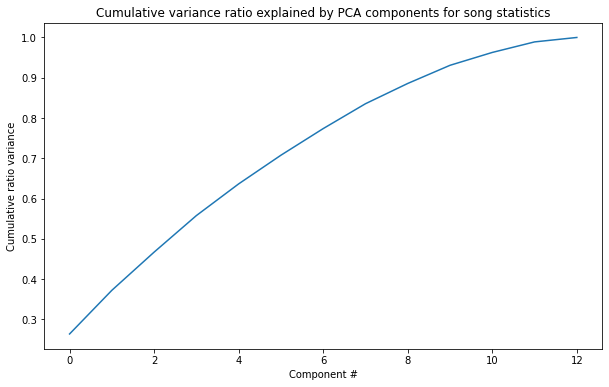

In [65]:
plt.subplots(figsize=(10, 6))
plt.plot(data_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for song statistics')

PCA does not seem to bring much explantive power. 